# EDA: F20DV

Datasets Explored:
1. COVID-19 by "Our World in Data": https://github.com/owid/covid-19-data/tree/master/public/data
2. COVID-19 Vaccinations: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("seaborn")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<b>TABLE OF CONTENTS</b>
* [1. Exploring Dataset 1](1.-Exploring-Dataset-1)
    * [1.1. Read Data](1.1.-Read-Data)
    * [1.2. Attributes of Interest](1.2.-Attributes-of-Interest)
    * [1.3. Data Processing](1.3.-Data-Processing)
    * [1.4. Pattern Recognition](1.4.-Pattern-Recognition)
    * [1.5. Experimental Zone](1.5.-Experimental-Zone)
    * [1.6. Save Data](1.5.-Save-Data)
* [2. Exploring Dataset 2](2.-Exploring-Dataset-2)
    * [2.1. Read Data](1.1.-Read-Data)
    * [2.2. Attributes of Interest](1.2.-Attributes-of-Interest)
    * [2.3. Experimental Zone](2.3.-Experimental-Zone)

## 1. Exploring Dataset 1

The first dataset that shall be explored is <i>Data on COVID-19 (coronavirus) by Our World in Data</i> found at https://github.com/owid/covid-19-data/tree/master/public/data.

### 1.1. Read Data

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df1 = pd.read_csv("../data/owid-covid-data.csv", parse_dates=['date'], date_parser=dateparse)
display(df1.head(3))
print(df1.shape)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


(164482, 67)


In [3]:
len(df1.dropna())
# every row with numeric data has at least 1 NaN value 
# so cannot just drop rows with NaN

0

### 1.2. Attributes of Interest

Determined upon going through description at: https://github.com/owid/covid-19-data/tree/master/public/data.

|#|Attribute|Type|Description|
|-----|-----|-----|-----|
|1|new_cases|numeric|New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.|
|2|new_deaths|numeric|New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.|
|3|hosp_patients|numeric|Number of COVID-19 patients in hospital on a given day.|
|4|stringency_index|numeric \[0,100\]|Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).|
|5|new_tests|numeric|New tests for COVID-19 (only calculated for consecutive days)|
|6|new_vaccinations|numeric|New COVID-19 vaccination doses administered (only calculated for consecutive days)|
|7|total_boosters|numeric|Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol).|
|8|iso_code|string|ISO 3166-1 alpha-3 – three-letter country codes.|
|9|continent|string|Continent of the geographical location.|
|10|location|string|Geographical location.|
|11|date|datetime|Date of observation.|
|12|population|numeric|Population of the location.|
|13|population_density|numeric|Number of people divided by land area, measured in square kilometers, most recent year available.|
|14|median_age|numeric|Median age of the population, UN projection for 2020.|
|15|gdp_per_capita|numeric|Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available.|
|16|extreme_poverty|numeric|Share of the population living in extreme poverty, most recent year available since 2010.|
|17|cardiovasc_death_rate|numeric|Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people).|
|18|diabetes_prevalence|numeric|Diabetes prevalence (% of population aged 20 to 79) in 2017|
|19|female_smokers|numeric|Share of women who smoke, most recent year available.|
|20|male_smokers|numeric|Share of men who smoke, most recent year available.|
|21|handwashing_facilities|numeric|Share of the population with basic handwashing facilities on premises, most recent year available.|
|22|human_development_index|numeric|A composite index measuring average achievement in three basic dimensions of human development which are a long and healthy life, knowledge and a decent standard of living.|

In [22]:
useful_data = df1[[
    "new_cases", "new_deaths", "hosp_patients", "stringency_index", "new_tests", 
    "new_vaccinations", "total_boosters", "iso_code", "continent", "location", "date", 
    "population", "population_density", "median_age", "gdp_per_capita", "extreme_poverty", 
    "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", 
    "male_smokers", "handwashing_facilities", "human_development_index"
]]
useful_data.describe()
useful_data.shape

(164482, 22)

### 1.3. Data Processing

In [23]:
# drop invalid locations like "World", "Asia", etc,
# so that locations refer to largely countries only.
useful_data = useful_data[useful_data["continent"].isna().apply(lambda boolean: not boolean)] 
useful_data.reset_index(drop=True, inplace=True) # reset index
useful_data.shape

(154630, 22)

In [24]:
# combine male and female smokers into 1 attribute "smokers"
useful_data["smokers"] = useful_data["female_smokers"] + useful_data["male_smokers"]
useful_data.drop(["female_smokers", "male_smokers"], axis=1, inplace=True)

In [26]:
# printing all fields
print(list(useful_data.columns), len(useful_data.columns))

['new_cases', 'new_deaths', 'hosp_patients', 'stringency_index', 'new_tests', 'new_vaccinations', 'total_boosters', 'iso_code', 'continent', 'location', 'date', 'population', 'population_density', 'median_age', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'handwashing_facilities', 'human_development_index', 'smokers', 'new_case_rate'] 22


### 1.4. Pattern Recognition

In [8]:
# determining how to deal with data over months
non_numeric = [
    "location", "continent", "iso_code", "date"
]

numeric = [
    'new_cases', 'new_deaths', 'hosp_patients', 'stringency_index', 'new_tests', 
    'new_vaccinations', 'total_boosters', 'population', 'population_density', 
    'median_age', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 
    'diabetes_prevalence', 'handwashing_facilities', 'human_development_index', 'smokers'
]

<AxesSubplot:>

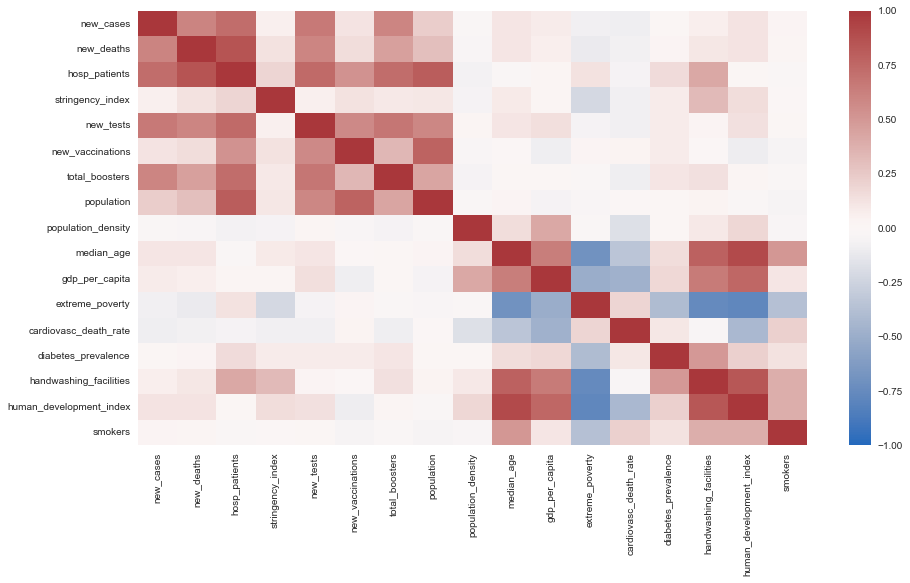

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(useful_data[numeric].corr(), cmap="vlag", vmin=-1, vmax=1)

<AxesSubplot:>

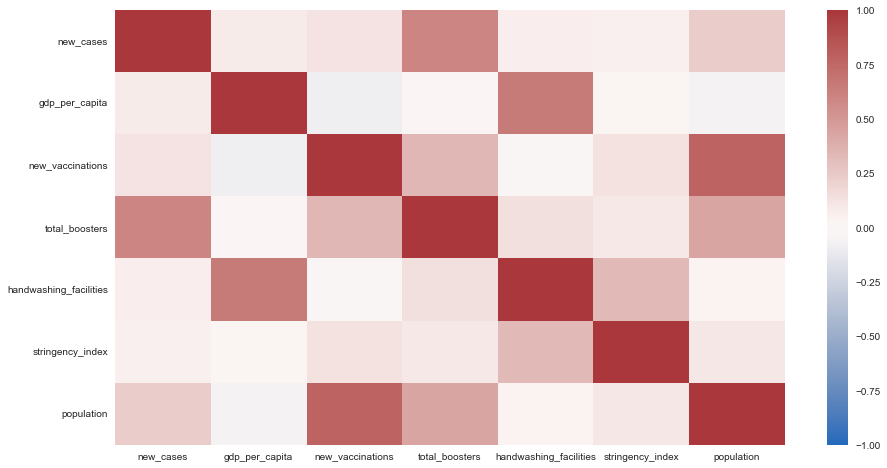

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(useful_data[[
    "new_cases", "gdp_per_capita", "new_vaccinations", "total_boosters", 
    "handwashing_facilities", "stringency_index", "population"
]].corr(), cmap="vlag", vmin=-1, vmax=1)

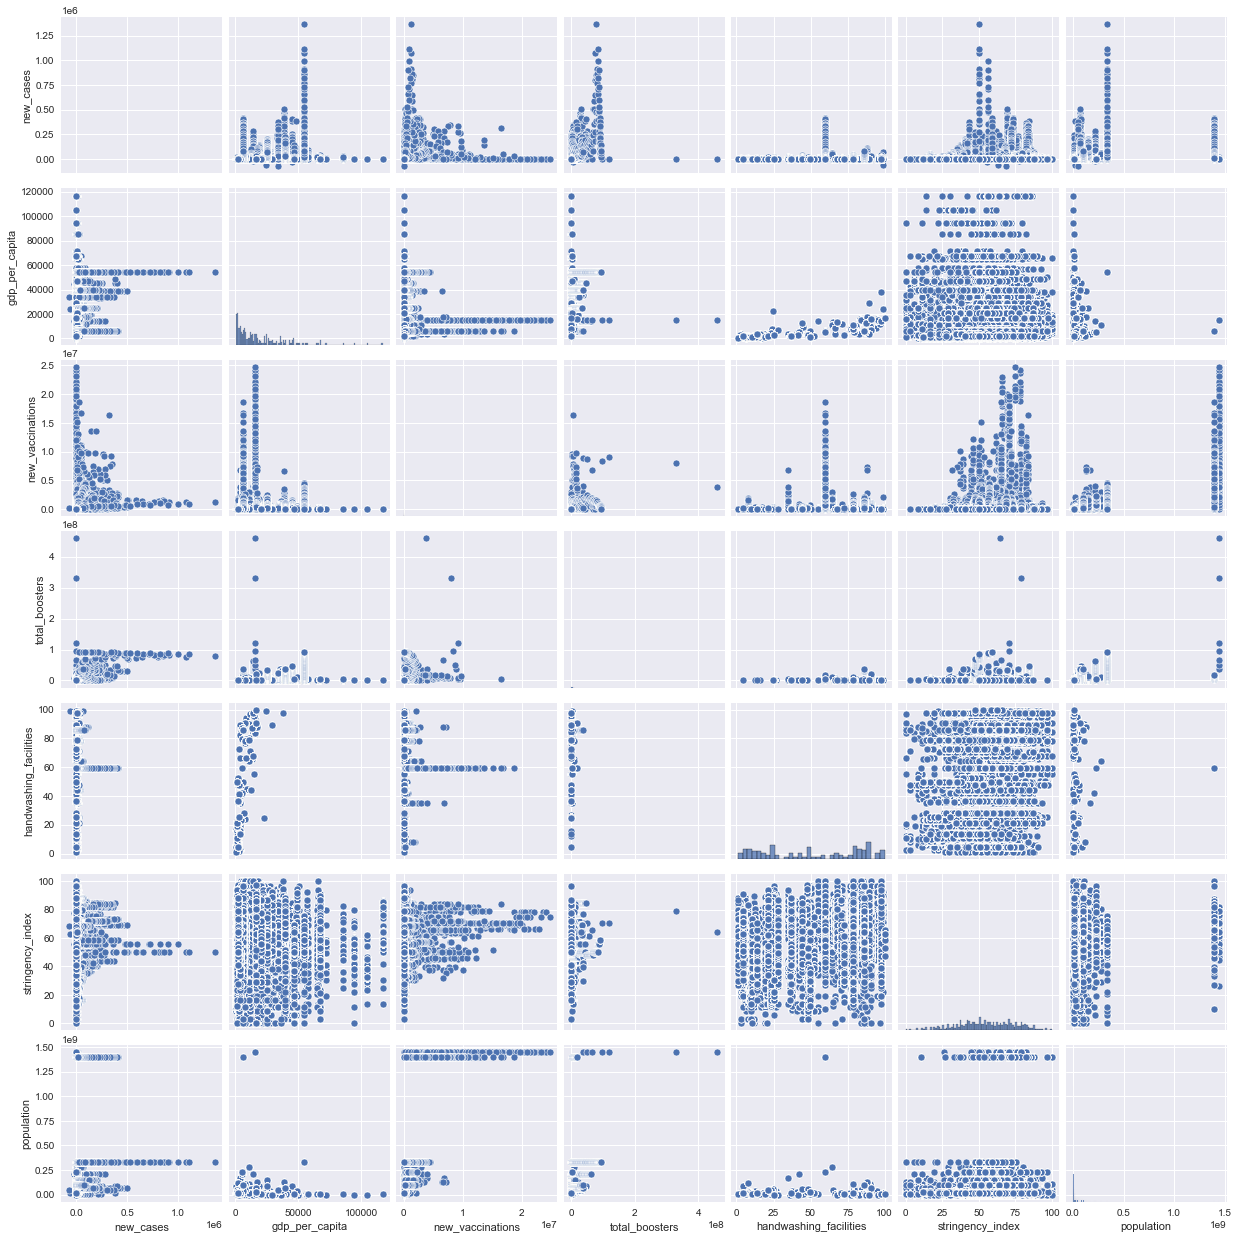

In [11]:
sns.pairplot(useful_data[[
    "new_cases", "gdp_per_capita", "new_vaccinations", "total_boosters", 
    "handwashing_facilities", "stringency_index", "population"
]])

### 1.5. Experimental Zone

In [12]:
# location continent mappings
continent_location_map = {}
location_continent_map = {}
def add_continent_location(continent, location):
    if not continent in continent_location_map: continent_location_map[continent] = set([location])
    else: continent_location_map[continent].add(location)
    if not location in location_continent_map: location_continent_map[location] = continent
useful_data[["continent", "location"]].apply(lambda row: add_continent_location(row[0], row[1]), axis=1);
print(continent_location_map["Asia"])

{'Azerbaijan', 'Bhutan', 'Iran', 'Japan', 'China', 'Nepal', 'Kazakhstan', 'Thailand', 'Yemen', 'Cambodia', 'Bahrain', 'Lebanon', 'Timor', 'Hong Kong', 'Kuwait', 'Mongolia', 'Israel', 'Tajikistan', 'Armenia', 'Iraq', 'Taiwan', 'United Arab Emirates', 'Uzbekistan', 'Syria', 'Brunei', 'Pakistan', 'South Korea', 'Macao', 'Bangladesh', 'Myanmar', 'Afghanistan', 'Georgia', 'Palestine', 'Philippines', 'Kyrgyzstan', 'Sri Lanka', 'Indonesia', 'Northern Cyprus', 'Jordan', 'Singapore', 'Malaysia', 'Laos', 'Oman', 'Saudi Arabia', 'Turkey', 'Vietnam', 'India', 'Maldives', 'Qatar', 'Turkmenistan'}


In [13]:
# location iso code mappings
location_code_df = df1[["iso_code", "location"]]
location_code_df = location_code_df.drop_duplicates().reset_index(drop=True)
display(location_code_df.head(3))
location_code_map = {}
code_location_map = {}
def add_location_code(location, code):
    if not location in location_code_map: location_code_map[location] = code
    if not code in code_location_map: code_location_map[code] = location
useful_data[["location", "iso_code"]].apply(lambda row: add_location_code(row[0], row[1]), axis=1);

,iso_code,location
0,AFG,Afghanistan
1,OWID_AFR,Africa
2,ALB,Albania


In [21]:
focus = useful_data[["new_vaccinations", "population"]] 
print("new vaccinations =", focus["new_vaccinations"].sum())
print("population =", focus["population"].mean())

new vaccinations = 9021463675.0
population = 37920945.104093626


In [ ]:
focus = useful_data[["new_cases", "population"]] 
print("new cases =", focus["new_cases"].sum())
print("population =", focus["population"].mean())

new cases = 431584821.0
population = 37920945.104093626


### 1.6. Save Data

In [ ]:
useful_data[[
    "location", "continent", "iso_code", "date", "new_cases", 
    "gdp_per_capita", "new_vaccinations", "total_boosters", 
    "handwashing_facilities", "stringency_index", "population"
]].to_csv("../data/useful_data.csv", index=False)

## 2. Exploring Dataset 2

The second dataset that shall be explored is <i>Data on COVID-19 (coronavirus) vaccinations by Our World in Data</i> found at https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations.

### 2.1. Read Data

In [ ]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df2 = pd.read_csv("../data/us_state_vaccinations.csv", parse_dates=['date'], date_parser=dateparse)
display(df2.head(3))

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN


### 2.2. Attributes of Interest

In [ ]:
print(list(df2.columns))

['date', 'location', 'total_vaccinations', 'total_distributed', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'distributed_per_hundred', 'daily_vaccinations_raw', 'daily_vaccinations', 'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters', 'total_boosters_per_hundred']


### 2.3. Experimental Zone